# Assignment 9: Causal Inference (Part 2)

## Objective:

Causal inference is the process of drawing a conclusion about a causal connection based on the conditions of the occurrence of an effect. It is a very powerful and widely-used tool in real-world applications and scenarios. In this assignment, you are expected to apply the basic concepts of causal inference to solve problems on real datasets and be able to achieve the following goals.

* Understand why causality is needed.
* Understand what is causality, particularly the difference between causality and correlation.
* Understand how to estimate counterfactual results.
* Understand how to use the graphical model to represent causality.
* Can use some tools (e.g., dowhy) to infer causality, express causality and estimate treatment effects.

# 0. Preparation

In [1]:
import numpy as np
import pandas as pd
# from dataprep.eda import plot
pd.options.mode.chained_assignment = None

In this assignment, you are going to use the [Lalonde](lalonde.csv) dataset. Each tuple in the dataset represents an individual who was enrolled (or not enrolled) in a job training program. It aims to evaluate the effectiveness of a job training program (the treatment variable) on the real earnings of an individual, after completing the program for years. 

The dataset consists of a number of demographic variables, like age, race, academic background, marriage status, and previous real earnings in 1974, 1975 as well as a treatment indicator, and the real earnings in the year 1978 (the outcome variable).

In [2]:
lalonde = pd.read_csv('lalonde.csv', index_col=0)
lalonde.head()
lalonde.head(-5)


,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
id,,,,,,,,,,
NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899
...,...,...,...,...,...,...,...,...,...,...
PSID420,0,39,2,1,0,1,1,0.0,0.0,964.9555
PSID421,0,55,8,0,0,1,1,0.0,0.0,0.0000
PSID422,0,16,9,0,0,0,1,0.0,0.0,5551.8190


In [3]:
# plot(lalonde)

## Task 1. Causal Graph 
In this task, you will draw a causal graph on a real-world dataset based on the information given. Please remind yourself of the difference between causality and correlation.

In [4]:
#import graphviz, the python tool we are going to use for this task
from graphviz import Digraph

In the Lalonde dataset, `treat` is the treatment attribute, which represents whether an individual was enrolled in the job training program or not. `re78` is the outcome attribute. `age` and `married` are confounding variables. Please draw the causal graph for these four attributes using Graphviz.

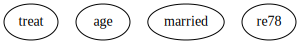

In [5]:
import os
dot = Digraph(comment='The causal graph for Lalonde')
dot.node('a','treat')
dot.node('b','age')
dot.node('c','married')
dot.node('d','re78')

dot

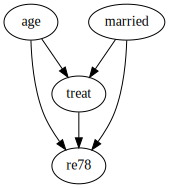

In [6]:
#<-- Write Your Code -->

#Implement your plot function here and show the graph, the output should be a causal graph
dot = Digraph(comment='The causal graph for Lalonde')
dot.node('a','treat')
dot.node('b','age')
dot.node('c','married')
dot.node('d','re78')

dot.edge('a', 'd')
dot.edge('b','a')
dot.edge('b', 'd')
dot.edge('c', 'a')
dot.edge('c', 'd')

dot

## Task 2. ATE Estimation
In this task, your job is to implement different AET estimation approaches and draw useful conclusions.

### 2.1 Perfect Matching
For the PSID tuples in the dataset (i.e., those individuals who weren't enrolled in the job training program), please use perfect matching to estimate their salaries if they received treatments?


In [7]:
#<-- Write Your Code -->

# Implement the perfect matching method here and output the count of PSID tuples whose counterfactual can be computed
# using perfect matching, as well as the percentage of such tuples among all PSID tuples. If there are multiple 
# tuples in the treatment group that can be matched with the control group, just select the first one
# output: count and percentage
df = pd.read_csv('lalonde.csv', index_col=0)
df_treatment = pd.read_csv('lalonde.csv', index_col=0)

df_treatment['index_col'] = df_treatment.index
df_treatment = df_treatment[df_treatment['index_col'].str.contains('NSW')]
df_treatment.drop('index_col', axis=1, inplace=True)
df_treatment.drop('treat', axis=1, inplace=True)

df['index_col'] = df.index
df = df[df['index_col'].str.contains('PSID')]
df.drop('index_col', axis=1, inplace=True)
df.drop('treat', axis=1, inplace=True)

count = 0 
control_outcome = []
treatment_outcome = []

for index, row in df.iterrows():
    control_list = list(row)
    for index2, row2 in df_treatment.iterrows():
        treatment_list = list(row2)
        # ignoring outcome column
        if control_list[:-1] == treatment_list[:-1]:
            count += 1
            control_outcome.append(control_list[-1]) # get outcome col
            treatment_outcome.append(treatment_list[-1])# get outcome col

            break
print("Control outcome: ",control_outcome)
print("Treament outcome: ",treatment_outcome)       

            
total_control = df.shape[0]
percentage = 100*count/total_control

Control outcome:  [2281.61, 0.0, 0.0, 12760.17, 17941.08, 11594.24, 16485.52, 7146.286, 0.0, 4520.366, 1053.619, 5306.516]
Treament outcome:  [11163.17, 0.0, 0.0, 8061.485, 17094.64, 0.0, 7458.105, 0.0, 16218.04, 8061.485, 16218.04, 11163.17]


In [8]:
# Run the following code to print out the result
print("Count of tuples which can be computed by perfect matching is " + str(count))
print("Percentage of such tuples among all PSID tuples is " + str(percentage))

Count of tuples which can be computed by perfect matching is 12
Percentage of such tuples among all PSID tuples is 2.797202797202797


In [9]:
#<-- Write Your Code -->

# Compute ATE among those PSID tuples whose counterfactual can be computed using perfect matching
# output: value of ATE
ATE = sum([a_i - b_i for a_i, b_i in zip(treatment_outcome,control_outcome )])/len(control_outcome)


In [10]:
# Run following code to print the result
print("ATE by perfect matching is " + str(ATE))

ATE by perfect matching is 1362.3939999999998


### 2.2 Nearest Neighbor Matching
For the PSID tuples in the dataset (i.e., those who weren't enrolled in the job training program), please use the nearest neighbor matching to estimate their salaries if they received treatments?

Please use all covariates (the attributes besides treatment and outcome) and use Euclidean distance as the distance metric.

In [11]:
#<-- Write Your Code -->

# Implement the nearest neighbor matching method here and output the count of PSID tuples whose counterfactual can be
# computed using nearest neighbor matching, when the threshold is set to 1000, as well as the percentage of such tuples among all PSID tuples
# Output: count and percentage
from math import sqrt
# Please use np.linalg.norm(x1 - x2) to compute the euclidean distance between two vectors

# Locate the most similar neighbors
def get_neighbors(treat, non_treat_row, num_neighbors):
    distances = list()
    count = 0
    for treat_row in treat:
        dist = np.linalg.norm(non_treat_row[-1] - treat_row[-1])
        distances.append((treat_row, non_treat_row,count,dist))
        count += 1
    distances.sort(key=lambda tup: tup[-1])
    return distances[0]

def get_matching_pairs(treated_df_, non_treated_df_, scaler=True):
#     treated_df = treated_df_.drop('re78', axis=1)
#     non_treated_df = non_treated_df_.drop('re78', axis=1)
#     treated_x = treated_df.values
#     non_treated_x = non_treated_df.values
    
    treated_x = treated_df_.values
    non_treated_x = non_treated_df_.values
        
    result_treat = []
    result_control = []
    for i in range(non_treated_x.shape[0]):
        treat,control,index,dist = get_neighbors(treated_x,non_treated_x[i],1) # 1 = Num neighbor
        if dist < 1000:
            result_treat.append(treat)
            result_control.append(control)
            # Remove the row in treament df that is already used and matched
            treated_x = np.delete(treated_x,index,axis=0)
            
    return result_treat,result_control
df_treatment2 = df_treatment.copy()
df_control2 = df.copy()
matched_treat,matched_control = get_matching_pairs(df_treatment2, df_control2)
treatment_outcome2 = [ar[-1] for ar in matched_treat]
control_outcome2 = [ar[-1] for ar in matched_control]

count = len(matched_control)
total_control = df_control2.shape[0]
percentage = 100*count/total_control
print(total_control)


429


In [12]:
#run following code to print the result
print("Count of tuples which can be computed by nearest neighbor matching is " + str(count))
print("Percentage of such tuples among all PSID tuples is " + str(percentage))

Count of tuples which can be computed by nearest neighbor matching is 181
Percentage of such tuples among all PSID tuples is 42.19114219114219


In [13]:
#<-- Write Your Code -->

# Compute ATE among those PSID tuples whose counterfactual can be computed using nearest neighbor matching
# Output: value of ATE

ATE = sum([a_i - b_i for a_i, b_i in zip(treatment_outcome2,control_outcome2 )])/len(control_outcome)


In [14]:
# Run following code to print out the result
print("ATE by nearest neighbor matching is " + str(ATE))

ATE by nearest neighbor matching is 170.0272575000004


### 2.3 Propensity Score Matching
For the PSID tuples in the dataset (i.e., those weren't enrolled in the job training program), please use propensity score matching to estimate their salaries if they received treatments?

Please use logistic regression to fit the propensity score.

In [15]:
#<-- Write Your Code -->

# Compute propensity score P(y = 1|X) for each tuple in the dataset. Use logistic regression.
# Output: add the new column "psm" to lalonde dataframe
from sklearn.linear_model import LogisticRegression
import scipy

df2 = pd.read_csv('lalonde.csv', index_col=0)
# df2 = pd.read_csv('lalonde.csv')

propensity = LogisticRegression()
propensity = propensity.fit(df2.iloc[:,1:-1], df2.treat)
pscore = propensity.predict_proba(df2.iloc[:,1:-1])[:,1] # The predicted propensities by the model

df2['psm'] = pscore
df2


d:\programs\anaconda3\envs\tf_gpu15\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,psm
id,,,,,,,,,,,
NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0.432245
NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0.133262
NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0.724404
NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0.660355
NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0.696809
...,...,...,...,...,...,...,...,...,...,...,...
PSID425,0,18,11,0,0,0,1,0.0,0.0,10150.5000,0.140849
PSID426,0,24,1,0,1,1,1,0.0,0.0,19464.6100,0.100313
PSID427,0,21,18,0,0,0,0,0.0,0.0,0.0000,0.127155


In [16]:
# Run the following code to see the result
lalonde.head()


,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
id,,,,,,,,,,
NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [17]:
#<-- Write Your Code -->

# For each tuple in the control group, find the matching tuple in the treatment group, and then compute
# the ATE over the population
# Please match tuples with the metric |psm1 - psm2| to be minimum, threhold set to 0.01
# Output: the value of ATE, the count of tuples that can be matched, as well as the percentage


def match(df,groups,propensity,threshold=0.01):
    groups = groups == groups.unique()[0]
    num = len(groups)
    num_treatment = groups.sum()
    num_control = num-num_treatment
   
    df_treatment, df_control = df[groups==1],(df[groups==0])   
    result = []
    for index, row in df_control.iterrows():
        dist_list =[]
        for index2,row2 in df_treatment.iterrows():
             psm_control = list(row)[-1]
             psm_treatment = list(row2)[-1]
             dist = abs(psm_treatment - psm_control)
             dist_list.append(dist)
        if min(dist_list) <= threshold:
#             result.append(min(dist_list))
            treatment_outcome = list(row2)[-2]
            control_outcome = list(row)[-2]
            result.append(treatment_outcome-control_outcome)

    return sum(result)/len(result),len(result),len(result)/df_control.shape[0]
ATE,count,percentage = match(df2,df2.treat,df2.psm,0.01)


In [18]:
# Run the following code to print out the result
print("ATE by propensity score matching is " + str(ATE))
print("Count of tuples which can be computed by propensity score matching is " + str(count))
print("Percentage of such tuples among all PSID tuples is " + str(percentage))

ATE by propensity score matching is -1960.3048831564906
Count of tuples which can be computed by propensity score matching is 377
Percentage of such tuples among all PSID tuples is 0.8787878787878788


### 2.4 Linear Regression
Train two individual models to fit P(y|t = 1,X) and P(y|t = 0,X), then infer the counterfactual outcome using two models while setting treatment to the opposite value. Infer the ATE over the population.

In [19]:
#<-- Write Your Code -->

# Train two individual linear regression models and infer the counterfactual result for each tuple
# Output: the value of ATE, over the population
from sklearn import  linear_model

df_treatment = pd.read_csv('lalonde.csv', index_col=0)
df_treatment['index_col'] = df_treatment.index
df_treatment = df_treatment[df_treatment['index_col'].str.contains('NSW')]
df_treatment.drop('index_col', axis=1, inplace=True)
# df_treatment.drop('treat', axis=1, inplace=True)

df_control = pd.read_csv('lalonde.csv', index_col=0)
df_control['index_col'] = df_control.index
df_control = df_control[df_control['index_col'].str.contains('PSID')]
df_control.drop('index_col', axis=1, inplace=True)

regr_control = linear_model.LinearRegression()
regr_control.fit(df_control.iloc[:,:-1], df_control.re78)
pred_control = regr_control.predict(df_treatment.iloc[:,:-1])
diff_list1 = list(df_treatment.iloc[:,-1] - pred_control)
regr_treatment = linear_model.LinearRegression()
regr_treatment.fit(df_treatment.iloc[:,:-1], df_treatment.re78)
pred_treatment = regr_treatment.predict(df_control.iloc[:,:-1])
diff_list2 = list(df_control.iloc[:,-1] - pred_treatment)

final_list = diff_list1 + diff_list2
ATE = sum(final_list)/len(final_list)

In [20]:
# Run following code to print out the result
print("ATE by linear regression is " + str(ATE))

ATE by linear regression is -82.06521337785782


Please briefly discuss the advantages and disadvantages of the above four approaches.

**A.** 
1.Perfect Matching: we compare samples that have similar covariate values (i.e. same age, education, race etc). However, our ability to compare such pairs depends heavily on the degree of overlap of the covariates between the treatment and control group. Therefore, the impact of data imbalance is to make the matching technique harder to apply. 

2.Nearest Neighbor Matching: this method is the common approach and easy to implement and understand. Also, Smith(1997) provides an illustration where estimates from 1:1 matching have lower standard deviations than estimates from a linear regression, even though thousands of observations were discarded in the matching. However, the concern is that, without any restrictions, k : 1 matching can lead to some poor matches; for example, if there are no control individuals with propensity scores similar to a given treated individual. One strategy to avoid poor matches is to impose a threshold and only select a
match if it is within that threshold. However, this can lead to difficulties in interpreting effects if many treated individuals do not receive a match but can help avoid poor matches. (ref: Matching Methods for Causal Inference:
A Review and a Look Forward, Elizabeth A. Stuart)

3.Propensity Score Matching(PSM): the advantage of this approach is that the  propensity score facilitates the construction of matched sets
with similar distributions of the covariates, without requiring close or exact matches on all of the individual variables compared to the Perfect Matching method. The weakness of PSM comes from its attempts to approximate a completely randomized experiment; therefore, it often accomplishes the opposite of its intended goal which results in increasing imbalance, inefficiency, model dependence, and bias.


4.Linear Regression: the advantage in this method is very straightforward and easy to implement. In addition, the modeling of the predictions as a weighted sum makes it transparent how predictions are produced. However, the weakness is that it only represents linear relationships, resulting in poor predictive performance as the relationships that can be learned are so restricted and usually oversimplify how complex reality is.

## Task 3. DoWhy
In this task, you are required to apply DoWhy and analyze the dataset using two ATE estimation methods.

In [21]:
# from dowhy.do_why import CausalModel
import dowhy 

# Change treat column to boolean value (in order to use Propensity score matching)
lalonde['treat'] = lalonde['treat'].astype(bool)
model=dowhy.CausalModel(
        data = lalonde,
        treatment='treat',
        outcome='re78',
#         common_causes=['nodegree','black','hisp','age','educ','married'])
        common_causes='nodegree+black+hisp+age+educ+married'.split('+'))
# model.view_model()
lalonde.describe()
lalonde.groupby('treat')['re78'].agg(['median','mean'])


INFO:dowhy.causal_model:Model to find the causal effect of treatment ['treat'] on outcome ['re78']


,median,mean
treat,,
False,4975.505,6984.169742
True,4232.309,6349.143530


In [22]:
#<-- Write Your Code -->

# Use the linear regression and PSM methods provided by DoWhy to estimate ATE 
# Output: ATE_linear, ATE_psm
identified_estimand = model.identify_effect()
# print(identified_estimand)
causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print('\n\n',causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))

ATE_linear = causal_estimate_reg.value

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['married', 'nodegree', 'hisp', 'black', 'educ', 'age']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: re78~treat+married+nodegree+black+educ+age




 *** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                       
────────(Expectation(re78|married,nodegree,black,educ,age))
d[treat]                                                   
Estimand assumption 1, Unconfoundedness: If U→{treat} and U→re78 then P(re78|treat,married,nodegree,black,educ,age,U) = P(re78|treat,married,nodegree,black,educ,age)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: re78~treat+married+nodegree+black+educ+age
## Estimate
Value: 1203.0914513083135

## Statistical Significance
p-value: 0.07099999999999995

Causal Estimate is 1203.0914513083135


In [23]:
# Run following code to print out the result
causal_estimate_match = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_matching")
print(causal_estimate_match)
ATE_psm = causal_estimate_match.value

print('---------------------------------')
print("ATE by linear regression is " + str(ATE_linear))
print("ATE by psm is " + str(ATE_psm))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: re78~treat+married+nodegree+black+educ+age
d:\programs\anaconda3\envs\tf_gpu15\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                       
────────(Expectation(re78|married,nodegree,black,educ,age))
d[treat]                                                   
Estimand assumption 1, Unconfoundedness: If U→{treat} and U→re78 then P(re78|treat,married,nodegree,black,educ,age,U) = P(re78|treat,married,nodegree,black,educ,age)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: re78~treat+married+nodegree+black+educ+age
## Estimate
Value: 73.62268737785037

---------------------------------
ATE by linear regression is 1203.0914513083135
ATE by psm is 73.62268737785037


Briefly explain why the result by DoWhy is not same as the result by your own implementation.

**A.** DoWhy uses Bayesian graphical model framework to represent assumptions. It identifies a suitable/required causal effect based on the graphical model calculations while our first simple linear regression does not have this assumption. One of the major advantages is that DoWhy treats identification and estimation separately. It uses graphical models to estimate the modelling assumption and to identify a non-parametric causal effect.

## Submission

Complete the code in this notebook, and submit it to the CourSys activity Assignment 9.